In [1]:
# ===========================
# Partie 1 : Imports et chargement du dataset
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Vérifier que les dossiers existent pour sauvegarder les résultats
os.makedirs("../results/graphs", exist_ok=True)

# Charger le dataset
df = pd.read_csv("data/water_potability.csv")

# Afficher les 5 premières lignes
print("Aperçu du dataset :")
display(df.head())

# Taille du dataset
print("\nShape du dataset :", df.shape)

# Infos sur le dataset (types, valeurs manquantes)
print("\nInfos dataset :")
df.info()

# Statistiques de base
print("\nStatistiques descriptives :")
display(df.describe())

Aperçu du dataset :


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



Shape du dataset : (3276, 10)

Infos dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Statistiques descriptives :


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [3]:
# ===========================
# Partie 2 : Prétraitement des données
# ===========================

from sklearn.preprocessing import StandardScaler

# Remplacer les valeurs manquantes
df.fillna({
    'ph': df['ph'].median(),
    'Sulfate': df['Sulfate'].median(),
    'Trihalomethanes': df['Trihalomethanes'].mean()
}, inplace=True)

# Vérification que toutes les valeurs manquantes sont remplacées
print("Valeurs manquantes après remplacement :")
print(df.isnull().sum())

# Séparer les features et la cible
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en train et test (80% / 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Vérification des dimensions
print("\nDimensions des jeux de données :")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


Valeurs manquantes après remplacement :
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Dimensions des jeux de données :
X_train: (2620, 9)
X_test : (656, 9)
y_train: (2620,)
y_test : (656,)


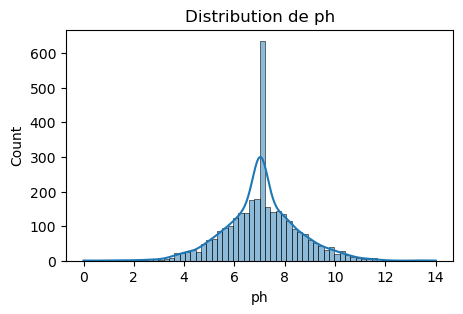

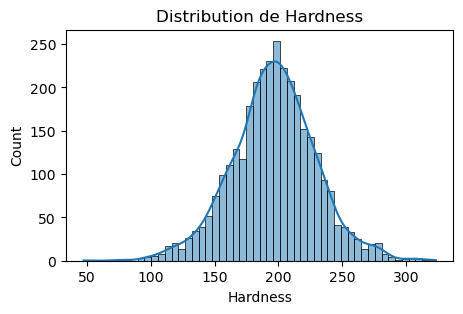

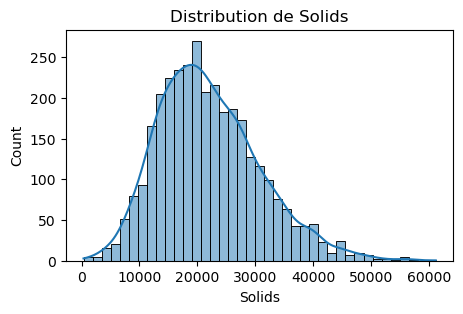

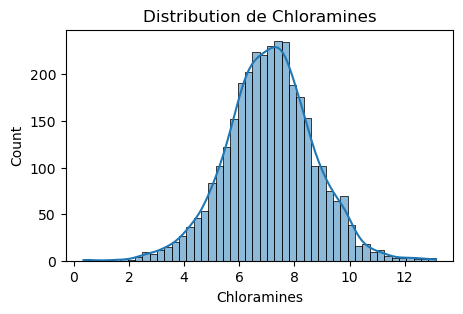

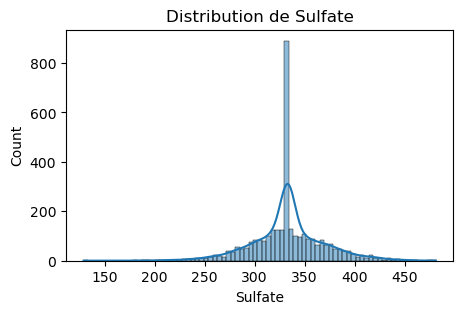

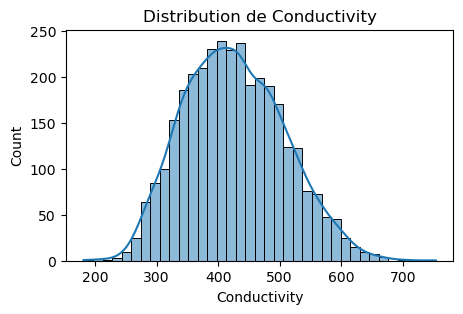

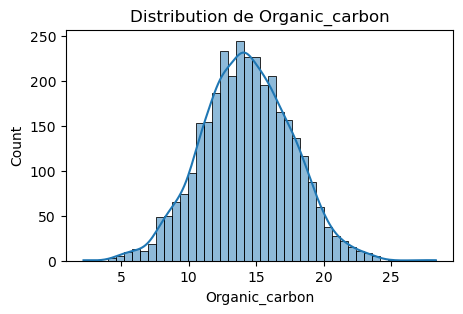

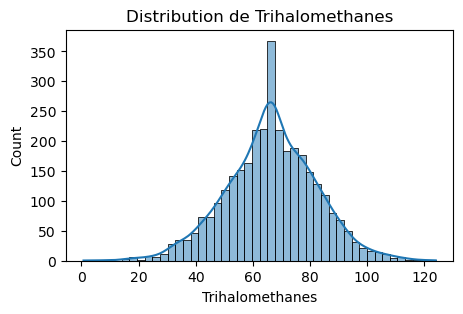

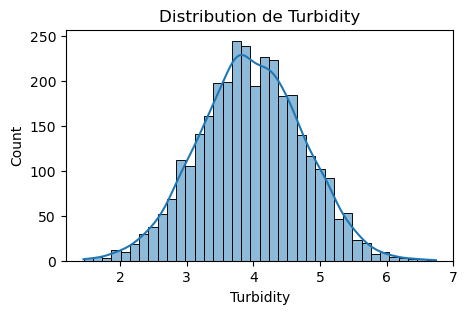

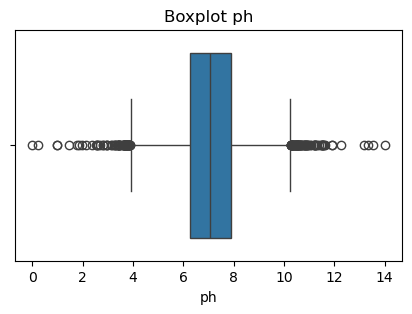

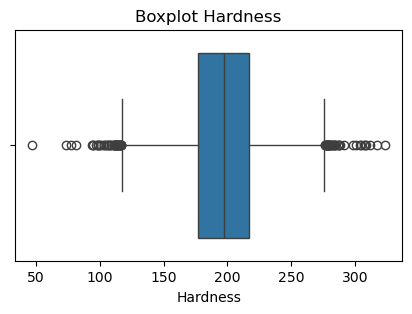

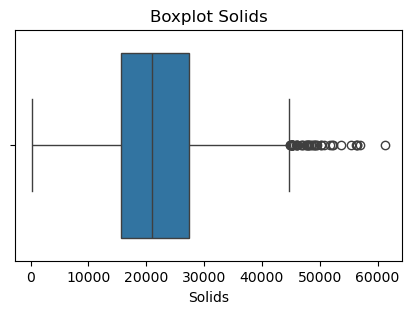

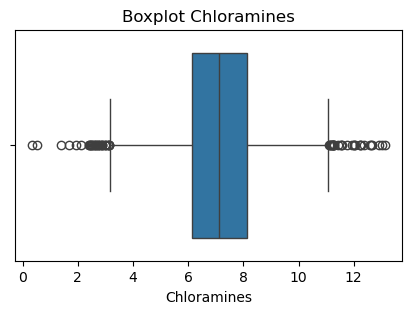

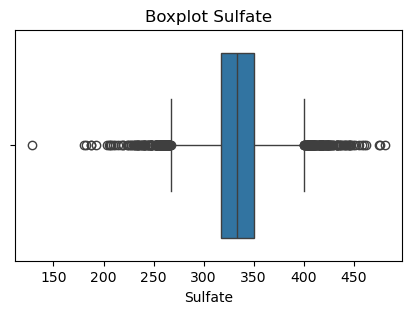

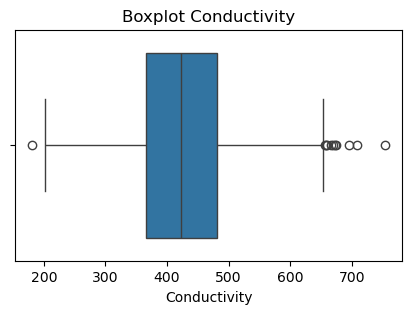

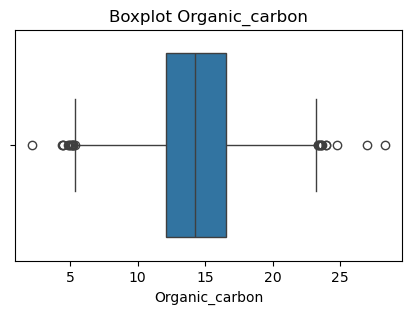

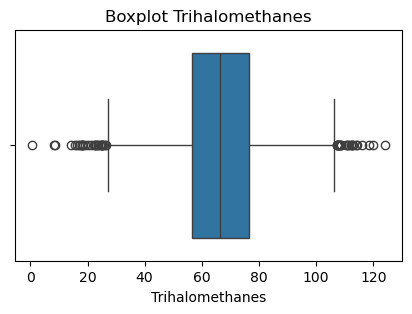

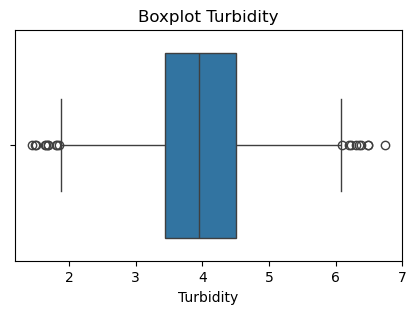

Moyenne des features selon Potability :


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.077736,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.308522,3.965800
1,7.068655,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.533513,3.968328


C:\Users\pc\AppData\Local\Temp\ipykernel_18484\546565532.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette=['#ff9999','#66b3ff'])


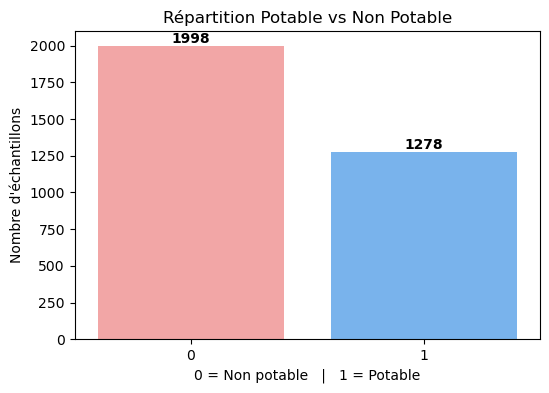

In [4]:
# ===========================
# Partie 3 : Visualisation des données
# ===========================

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de chaque feature
for col in X.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

# Boxplot pour détecter les outliers
for col in X.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

# Comparaison potable vs non potable (moyenne par feature)
mean_by_potability = df.groupby('Potability').mean()
print("Moyenne des features selon Potability :")
display(mean_by_potability)

# Countplot pour la répartition des classes
plt.figure(figsize=(6,4))
sns.countplot(x='Potability', data=df, palette=['#ff9999','#66b3ff'])
plt.title("Répartition Potable vs Non Potable")
plt.xlabel("0 = Non potable   |   1 = Potable")
plt.ylabel("Nombre d'échantillons")
for i, v in enumerate(df['Potability'].value_counts()):
    plt.text(i, v + 20, str(v), ha='center', fontweight='bold')
plt.show()


Meilleurs hyperparamètres SVM : {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Métriques SVM :
Accuracy : 0.6707317073170732
Precision: 0.7040816326530612
Recall   : 0.26953125
F1-Score : 0.3898305084745763

Classification Report :
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       400
           1       0.70      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.68      0.67      0.62       656



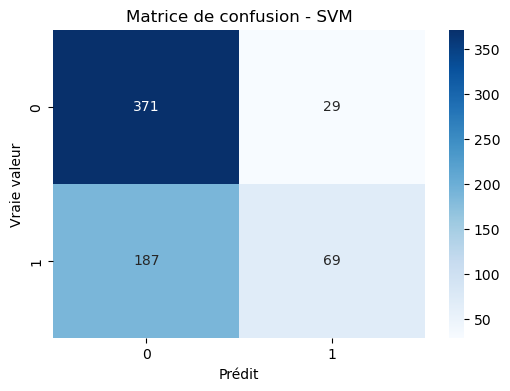

In [5]:
# ===========================
# Partie 4 : SVM
# ===========================

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Définir les hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Créer le modèle SVM
svm_model = SVC(random_state=42)

# GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs hyperparamètres SVM :", grid_search.best_params_)

# Prédiction sur le jeu de test
y_pred_svm = grid_search.predict(X_test)

# Métriques de performance
print("\nMétriques SVM :")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("F1-Score :", f1_score(y_test, y_pred_svm))

# Rapport complet
print("\nClassification Report :")
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédit")
plt.ylabel("Vraie valeur")
plt.show()


Répartition des classes avant SMOTE :
Potability
0    1598
1    1022
Name: count, dtype: int64

Répartition des classes après SMOTE :
Potability
0    1598
1    1598
Name: count, dtype: int64

Métriques SVM après SMOTE :
Accuracy : 0.6204268292682927
Precision: 0.5130111524163569
Recall   : 0.5390625
F1-Score : 0.5257142857142857

Classification Report après SMOTE :
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       400
           1       0.51      0.54      0.53       256

    accuracy                           0.62       656
   macro avg       0.60      0.61      0.60       656
weighted avg       0.62      0.62      0.62       656



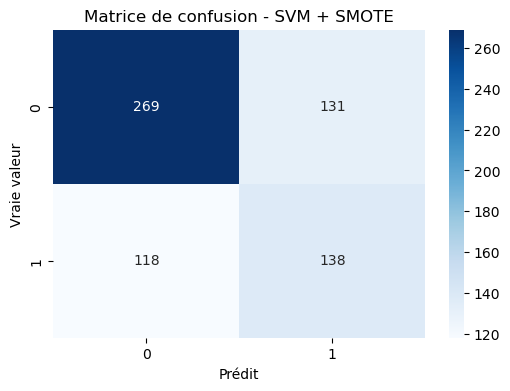

In [6]:
# ===========================
# Partie 5 : Rééquilibrage avec SMOTE
# ===========================

from imblearn.over_sampling import SMOTE

# Créer l'objet SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE sur le jeu d'entraînement
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Vérifier la répartition après SMOTE
print("Répartition des classes avant SMOTE :")
print(y_train.value_counts())
print("\nRépartition des classes après SMOTE :")
print(pd.Series(y_train_sm).value_counts())

# Réentraînement du SVM avec les mêmes meilleurs hyperparamètres
svm_sm = SVC(C=1, gamma='scale', kernel='rbf', random_state=42)
svm_sm.fit(X_train_sm, y_train_sm)

# Prédiction sur le jeu de test
y_pred_sm = svm_sm.predict(X_test)

# Métriques SVM après SMOTE
print("\nMétriques SVM après SMOTE :")
print("Accuracy :", accuracy_score(y_test, y_pred_sm))
print("Precision:", precision_score(y_test, y_pred_sm))
print("Recall   :", recall_score(y_test, y_pred_sm))
print("F1-Score :", f1_score(y_test, y_pred_sm))

# Rapport complet
print("\nClassification Report après SMOTE :")
print(classification_report(y_test, y_pred_sm))

# Matrice de confusion
cm_svm_sm = confusion_matrix(y_test, y_pred_sm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm_sm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - SVM + SMOTE")
plt.xlabel("Prédit")
plt.ylabel("Vraie valeur")
plt.show()

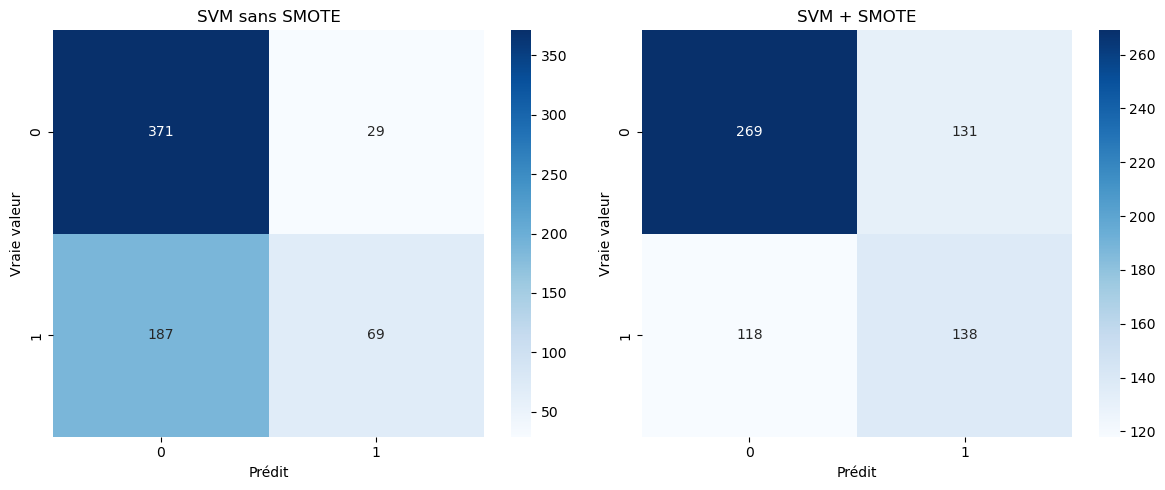

C:\Users\pc\AppData\Local\Temp\ipykernel_18484\1963722278.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='viridis')


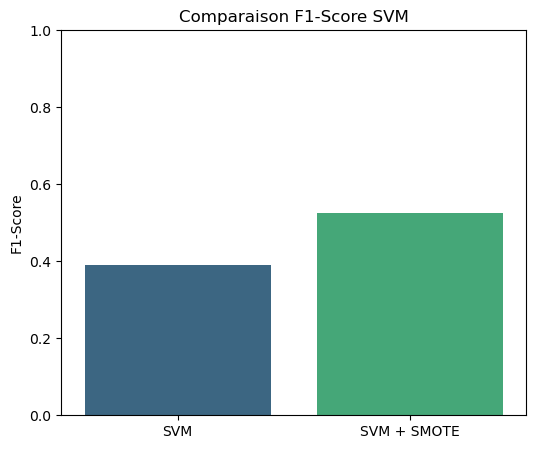

In [8]:
# Comparaison SVM sans et avec SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# SVM sans SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("SVM sans SMOTE")
axes[0].set_xlabel("Prédit")
axes[0].set_ylabel("Vraie valeur")

# SVM avec SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("SVM + SMOTE")
axes[1].set_xlabel("Prédit")
axes[1].set_ylabel("Vraie valeur")

plt.tight_layout()
plt.savefig("../results/graphs/comparaison_matrices_confusion_svm.png", dpi=300, bbox_inches='tight')
plt.show()

# Bar plot F1-score pour SVM
f1_scores = {
    'SVM': f1_score(y_test, y_pred_svm),
    'SVM + SMOTE': f1_score(y_test, y_pred_sm)
}

plt.figure(figsize=(6,5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='viridis')
plt.ylabel("F1-Score")
plt.title("Comparaison F1-Score SVM")
plt.ylim(0,1)
plt.savefig("../results/graphs/comparaison_f1score_svm.png", dpi=300, bbox_inches='tight')
plt.show()
